In [4]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import datetime 
from datetime import date 
import holidays 

In [5]:
bikes_daily = pd.read_csv("CBS_2021-2023_Daily_Weather.csv", parse_dates=["Date"])
# bikes_hourly = pd.read_csv("CBS_2021-2023_Hourly_Weather.csv", parse_dates=["Date"])

In [6]:
bikes_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [8]:
bikes_daily["Date"].max()

Timestamp('2023-12-31 00:00:00')

In [6]:
bikes_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 68.6 KB


In [8]:
bikes_daily.shape

(1095, 8)

In [10]:
bikes_daily.isna().sum()

Casual                            0
Date                              0
Member                            0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
dtype: int64

In [11]:
bikes_daily.duplicated().sum()

np.int64(0)

In [ ]:
us_holidays = holidays.USA()
for ptr in holidays.UnitedKingdom(years = [2021,2022,2023]).items(): 
    print(ptr) 

(datetime.date(2021, 4, 2), 'Good Friday')
(datetime.date(2021, 5, 3), 'May Day')
(datetime.date(2021, 5, 31), 'Spring Bank Holiday')
(datetime.date(2021, 1, 1), "New Year's Day")
(datetime.date(2021, 12, 25), 'Christmas Day')
(datetime.date(2021, 12, 27), 'Christmas Day (observed)')
(datetime.date(2021, 12, 26), 'Boxing Day')
(datetime.date(2021, 12, 28), 'Boxing Day (observed)')
(datetime.date(2022, 4, 15), 'Good Friday')
(datetime.date(2022, 5, 2), 'May Day')
(datetime.date(2022, 6, 2), 'Spring Bank Holiday')
(datetime.date(2022, 6, 3), 'Platinum Jubilee of Elizabeth II')
(datetime.date(2022, 9, 19), 'State Funeral of Queen Elizabeth II')
(datetime.date(2022, 1, 1), "New Year's Day")
(datetime.date(2022, 1, 3), "New Year's Day (observed)")
(datetime.date(2022, 12, 25), 'Christmas Day')
(datetime.date(2022, 12, 27), 'Christmas Day (observed)')
(datetime.date(2022, 12, 26), 'Boxing Day')
(datetime.date(2023, 4, 7), 'Good Friday')
(datetime.date(2023, 5, 1), 'May Day')
(datetime.date(2

In [15]:
bikes_daily["is_holiday"] = bikes_daily["Date"].apply(lambda x: x in us_holidays)
bikes_daily

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),is_holiday
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,False
...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,False
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,False
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,False
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,False


In [23]:
bikes_daily['year'] = bikes_daily['Date'].dt.year
bikes_daily['month'] = bikes_daily['Date'].dt.month
bikes_daily['day'] = bikes_daily['Date'].dt.day
bikes_daily['dow'] = bikes_daily['Date'].dt.dayofweek
bikes_daily['weekend'] = np.where(bikes_daily['dow'].isin([5, 6]), 1, 0)
bikes_daily = bikes_daily.drop(columns=["start_time", "end_time", "start_hour"])

In [86]:
bikes_daily["season"] = bikes_daily["month"].apply(lambda x: "winter" if x in ([12,1,2])
                                                   else "spring" if x in ([3,4,5])
                                                   else "summer" if x in ([6,7,8])
                                                   else "autumn")

bikes_daily["season"]= pd.Categorical(bikes_daily["season"], categories= ["winter","spring","summer","autumn"])


In [32]:
bikes_daily.sample(n=10)

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),is_holiday,year,month,day,dow,weekend,season
138,3541,2021-05-19,5463,9004,21.4,21.4,1,11.1,No,2021,5,19,2,0,spring
47,557,2021-02-17,1392,1949,-6.8,-1.9,1,20.5,No,2021,2,17,2,0,winter
356,1189,2021-12-23,2471,3660,-3.5,0.8,2,13.8,No,2021,12,23,3,0,winter
220,3201,2021-08-09,4619,7820,30.1,26.0,63,13.5,No,2021,8,9,0,0,summer
205,5212,2021-07-25,4660,9872,30.4,28.0,51,15.6,No,2021,7,25,6,1,summer
133,3984,2021-05-14,5230,9214,13.7,15.2,1,8.9,No,2021,5,14,4,0,spring
229,2995,2021-08-18,5211,8206,30.7,26.2,61,17.8,No,2021,8,18,2,0,summer
56,1230,2021-02-26,2543,3773,0.9,4.7,71,12.8,No,2021,2,26,4,0,winter
1067,2853,2023-12-04,8771,11624,-1.4,2.8,0,15.2,No,2023,12,4,0,0,winter
698,1457,2022-11-30,4872,6329,5.7,9.4,63,27.1,No,2022,11,30,2,0,autumn


In [ ]:
bikes_daily.loc[bikes_daily["is_holiday"] == False, "is_holiday"] = "No"
bikes_daily.loc[bikes_daily["is_holiday"] == True, "is_holiday"] = "Yes"
bikes_daily.loc[bikes_daily["weekend"] == 0, "weekend"] = "No"
bikes_daily.loc[bikes_daily["weekend"] == 1, "weekend"] = "Yes"

In [39]:
bikes_daily

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),is_holiday,year,month,day,dow,weekend,season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Yes,2021,1,1,4,No,winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,No,2021,1,2,5,Yes,winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,No,2021,1,3,6,Yes,winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,No,2021,1,4,0,No,winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,No,2021,1,5,1,No,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,No,2023,12,27,2,No,winter
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,No,2023,12,28,3,No,winter
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,No,2023,12,29,4,No,winter
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,No,2023,12,30,5,Yes,winter


Dataframes for each year

In [ ]:
year_2021 = bikes_daily[bikes_daily["year"]==2021]
year_2022 = bikes_daily[bikes_daily["year"]==2022]
year_2023 = bikes_daily[bikes_daily["year"]==2023]

# bike rides per year

<Axes: xlabel='year', ylabel='Total_rides'>

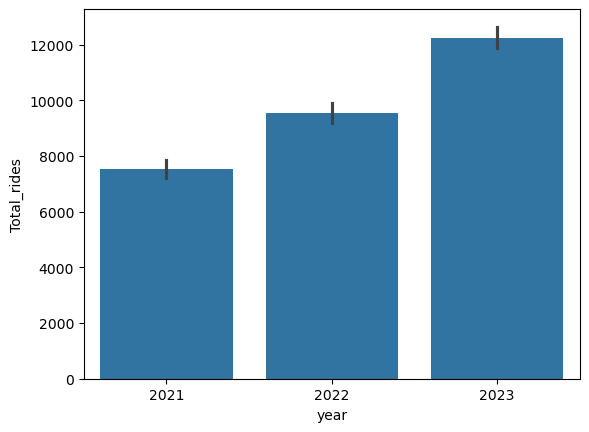

In [46]:
sns.barplot(data=bikes_daily, x="year", y="Total_rides")

# Rides per day of the week

In [95]:
avg_rides_per_day = round(bikes_daily.groupby("dow")["Total_rides"].mean(),0)
avg_rides_per_day

dow
0     8868.0
1     9653.0
2     9896.0
3     9862.0
4     9756.0
5    10921.0
6     9402.0
Name: Total_rides, dtype: float64

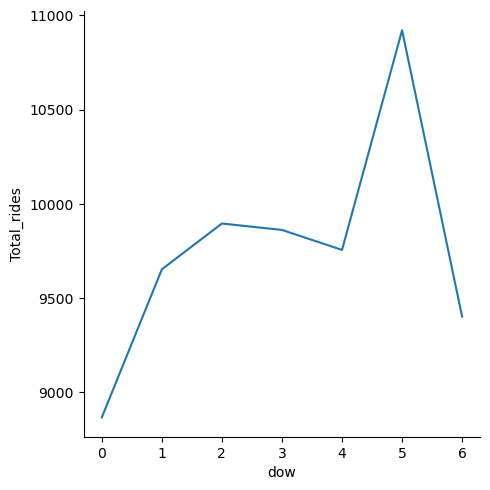

In [98]:
sns.relplot(kind="line", data= avg_rides_per_day)

<Axes: xlabel='dow', ylabel='Total_rides'>

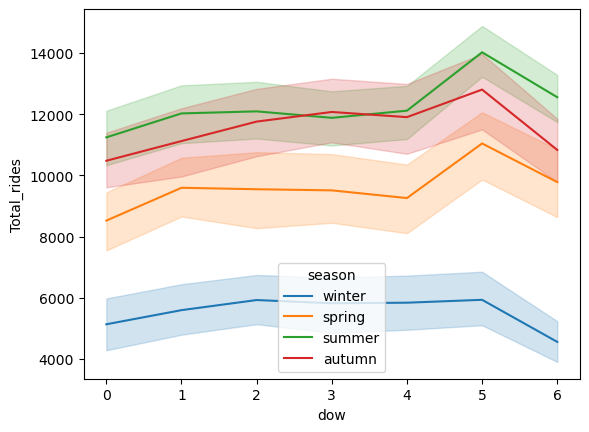

In [99]:
sns.lineplot(data=bikes_daily, x="dow", y= "Total_rides", hue="season")

In [ ]:
total_rides_per_day = bikes_daily.groupby("dow")["Total_rides"].sum()

dow
0    1383402
1    1505902
2    1543727
3    1538491
4    1531697
5    1714630
6    1476148
Name: Total_rides, dtype: int64

In [64]:
bikes_daily.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)', 'is_holiday',
       'year', 'month', 'day', 'dow', 'weekend', 'season'],
      dtype='object')

# Correlation between temperature/season and total rides

<Axes: xlabel='apparent_temperature_mean (°C)', ylabel='Total_rides'>

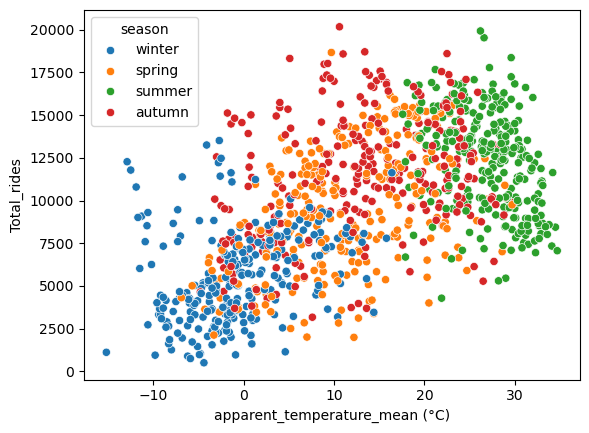

In [66]:
sns.scatterplot(data=bikes_daily, x= "apparent_temperature_mean (°C)", y="Total_rides", hue= "season")

<Axes: xlabel='windspeed_10m_max (km/h)', ylabel='Total_rides'>

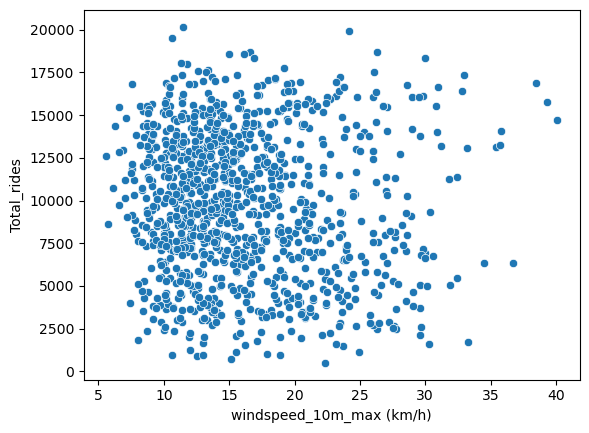

In [68]:
sns.scatterplot(data=bikes_daily, x= "windspeed_10m_max (km/h)", y="Total_rides")

# comparisson between regular days and weekends

In [80]:
avg_rides_per_day_weekends = round(bikes_daily.groupby("weekend")["Total_rides"].mean(),0)
avg_rides_per_day_weekends

weekend
No      9607.0
Yes    10162.0
Name: Total_rides, dtype: float64

<Axes: xlabel='weekend', ylabel='Total_rides'>

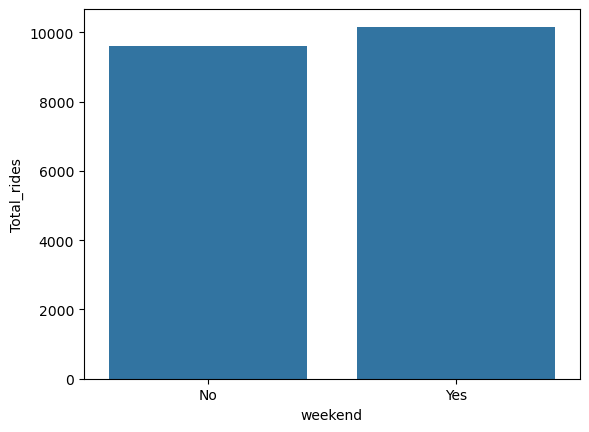

In [81]:
sns.barplot(data=avg_rides_per_day_weekends)

# comparisson between regular days and public holidays

In [79]:
avg_rides_per_day_holidays = round(bikes_daily.groupby("is_holiday")["Total_rides"].mean(),0)
avg_rides_per_day_holidays

is_holiday
No     9806.0
Yes    8754.0
Name: Total_rides, dtype: float64

<Axes: xlabel='is_holiday', ylabel='Total_rides'>

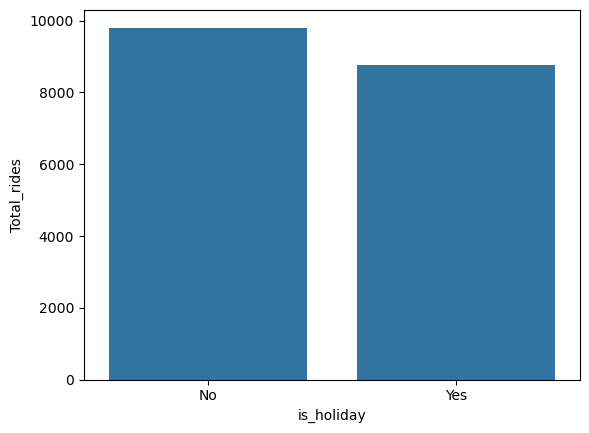

In [83]:
sns.barplot(data=avg_rides_per_day_holidays)

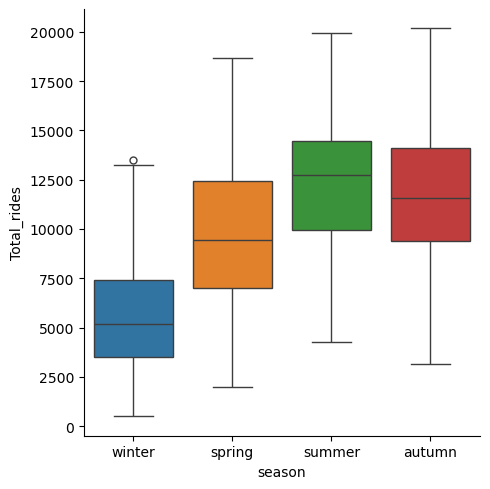

In [88]:
sns.catplot(data = bikes_daily, kind='box', x = "season" , y = "Total_rides", hue="season")

<Axes: xlabel='month', ylabel='Total_rides'>

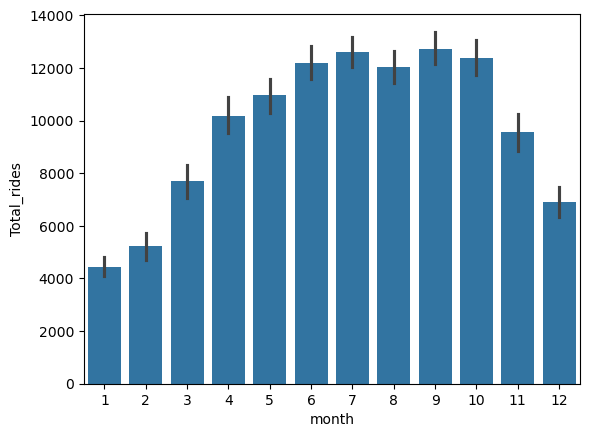

In [91]:
sns.barplot(data=bikes_daily, x="month", y="Total_rides")

# weather coding

00 - Cloud development not observed or not observable
01 - Cloud generally dissolving or becoming less developed
02 - State of sky on the whole unchanged
03 - Clouds generally forming or developing
04 - Visibility reduced by smoke, e.g. veldt or forest fires, industrial smoke or
volcanic ashes
05 - Haze
06 - Widespread dust in suspension in the air, not raised by wind at or near the
station at the time of observation
07 - Dust or sand raised by wind at or near the station at the time of
observation, but not well-developed dust whirl(s) or sand whirl(s),
and no duststorm or sandstorm seen; or, in the case of ships, blowing
spray at the station
08 - Well-developed dust or sand whirl(s) seen at or near the station during the
preceding hour or at the time of observation, but no dust storm or sandstorm
09 - Duststorm or sandstorm within sight at the time of observation, or at the
station during the preceding hour
10 - Mist
11 - Patches of shallow fog or ice fog at the station, whether on land or sea not
deeper than about 2 metres on land or 10 metres at sea
12 - More or less continuous shallow fog or ice fog at the station, whether on
land or sea, not deeper than about 2m/land or 10m/sea
13 - Lightning visible, or thunder heard
14 - Precipitation within sight, not reaching the ground or the surface of the
sea
15 - Precipitation within sight, reaching the ground or the surface of the sea,
but distant, i.e. > 5 km from the station
16 - Precipitation within sight, reaching the ground or the surface of the sea,
near to, but not at the station
17 - Thunderstorm, but no precipitation at the time of observation
18 - Squalls at or within sight of the station during the preceding hour or at
the time of observation
19 - Funnel clouds at or within sight of the station during the preceding hour or
at the time of observation
20 - Drizzle (not freezing) or snow grains, not falling as showers, during the
preceding hour but not at the time of observation
21 - Rain (not freezing), not falling as showers, during the preceding hour but
not at the time of observation
22 - Snow, not falling as showers, during the preceding hour but not at the
time of observation
23 - Rain and snow or ice pellets, not falling as showers; during the preceding
hour but not at the time of observation
24 - Freezing drizzle or freezing rain; during the preceding hour but not at the
time of observation
25 - Shower(s) of rain during the preceding hour but not at the time of
observation
26 - Shower(s) of snow, or of rain and snow during the preceding hour but not at

the time of observation
27 - Shower(s) of hail, or of rain and hail during the preceding hour but not at
the time of observation
28 - Fog or ice fog during the preceding hour but not at the time of observation
29 - Thunderstorm (with or without precipitation) during the preceding hour but
not at the time of observation
30 - Slight or moderate duststorm or sandstorm - has decreased during the
preceding hour
31 - Slight or moderate duststorm or sandstorm - no appreciable change during
the preceding hour
32 - Slight or moderate duststorm or sandstorm - has begun or has increased
during the preceding hour
33 - Severe duststorm or sandstorm - has decreased during the preceding hour
34 - Severe duststorm or sandstorm - no appreciable change during the preceding
hour
35 - Severe duststorm or sandstorm - has begun or has increased during the
preceding hour
36 - Slight/moderate drifting snow - generally low (below eye level)
37 - Heavy drifting snow - generally low (below eye level)
38 - Slight/moderate blowing snow - generally high (above eye level)
39 - Heavy blowing snow - generally high (above eye level)
40 - Fog or ice fog at a a distance at the time of observation, but not at
station during the preceding hour, the fog or ice fog extending to a
level above that of the observer
41 - Fog or ice fog in patches
42 - Fog/ice fog, sky visible, has become thinner during the preceding hour
43 - Fog/ice fog, sky invisible, has become thinner during the preceding hour
44 - Fog or ice fog, sky visible, no appreciable change during the past hour
45 - Fog or ice fog, sky invisible, no appreciable change during the preceding
hour
46 - Fog or ice fog, sky visible, has begun or has become thicker during
preceding hour
47 - Fog or ice fog, sky invisible, has begun or has become thicker during the
preceding hour
48 - Fog, depositing rime, sky visible
49 - Fog, depositing rime, sky invisible
50 - Drizzle, not freezing, intermittent, slight at time of ob.
51 - Drizzle, not freezing, continuous, slight at time of ob.
52 - Drizzle, not freezing, intermittent, moderate at time of ob.
53 - Drizzle, not freezing, continuous, moderate at time of ob.
54 - Drizzle, not freezing, intermittent, heavy at time of ob.
55 - Drizzle, not freezing, continuous, heavy at time of ob.
56 - Drizzle, freezing, slight
57 - Drizzle, freezing, moderate or heavy (dense)
58 - Rain and drizzle, slight
59 - Rain and drizzle, moderate or heavy
60 - Rain, not freezing, intermittent, slight at time of ob.
61 - Rain, not freezing, continuous, slight at time of ob.
62 - Rain, not freezing, intermittent, moderate at time of ob.
63 - Rain, not freezing, continuous, moderate at time of ob.
64 - Rain, not freezing, intermittent, heavy at time of ob.

65 - Rain, not freezing, continuous, heavy at time of ob.
66 - Rain, freezing, slight
67 - Rain, freezing, moderate or heavy
68 - Rain or drizzle and snow, slight
69 - Rain or drizzle and snow, moderate or heavy
70 - Intermittent fall of snowflakes, slight at time of ob.
71 - Continuous fall of snowflakes, slight at time of ob.
72 - Intermittent fall of snowflakes, moderate at time of ob.
73 - Continuous fall of snowflakes, moderate at time of ob.
74 - Intermittent fall of snowflakes, heavy at time of ob.
75 - Continuous fall of snowflakes, heavy at time of ob.
76 - Diamond dust (with or without fog)
77 - Snow grains (with or without fog)
78 - Isolated star-like snow crystals (with or without fog)
79 - Ice pellets
80 - Rain shower(s), slight
81 - Rain shower(s), moderate or heavy
82 - Rain shower(s), violent
83 - Shower(s) of rain and snow, slight
84 - Shower(s) of rain and snow, moderate or heavy
85 - Snow shower(s), slight
86 - Snow shower(s), moderate or heavy
87 - Shower(s) of snow pellets or small hail, with or without rain or rain and
snow mixed - slight
88 - Shower(s) of snow pellets or small hail, with or without rain or rain and
snow mixed - moderate or heavy
89 - Shower(s) of hail, with or without rain or rain and snow mixed, not
associated with thunder - slight
90 - Shower(s) of hail, with or without rain or rain and snow mixed, not
associated with thunder - moderate or heavy
91 - Slight rain at time of observation - Thunderstorm during the preceding hour
but not at time of observation
92 - Moderate or heavy rain at time of observation - Thunderstorm during the
preceding hour but not at time of observation
93 - Slight snow, or rain and snow mixed or hail at time of observation -
Thunderstorm during the preceding hour but not at time of observation
94 - Moderate or heavy snow, or rain and snow mixed or hail at time of
observation - Thunderstorm during the preceding hour but not at
time of observation
95 - Thunderstorm, slight or moderate, without hail, but with rain and/or snow at
time of observation
96 - Thunderstorm, slight or moderate, with hail at time of ob.
97 - Thunderstorm, heavy, without hail, but with rain and/or snow at time of
observation
98 - Thunderstorm combined with dust/sandstorm at time of observation
99 - Thunderstorm, heavy with hail at time of observation

In [141]:
bikes_daily["weather_condition"] = bikes_daily["weathercode (wmo code)"].apply(lambda x:
                                                                      "clear sky" if x == 0
                                                                      else "cloudy, foggy, reduced visibility" if x in range (1,13) or x in range (40,50)
                                                                      else "dust,smoke and sandstorms" if x in range (4,10) or x in range (30,46)
                                                                      else "precipitations" if x in range (20,28) or x in range (50,80) or x in range (80,91)
                                                                      else "thunderstorms and severe weather" if x in (13,29) or x in range (17,20) or x in range (95,99)
                                                                      else "Others")


In [140]:
bikes_daily["weather_condition"].unique()

array(['precipitations', 'cloudy, foggy, reduced visibility', 'clear sky'],
      dtype=object)

In [132]:
bikes_daily.sample(n=10)

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),is_holiday,year,month,day,dow,weekend,season,temperature_feel,weather_condition
172,2331,2021-06-22,4255,6586,23.0,21.2,61,17.1,No,2021,6,22,1,No,summer,warm,precipitations
669,3356,2022-11-01,7868,11224,16.4,16.6,61,15.2,No,2022,11,1,1,No,autumn,pleasant,precipitations
781,2542,2023-02-21,6232,8774,8.3,10.9,53,25.1,No,2023,2,21,1,No,winter,cold,precipitations
708,2660,2022-12-10,4753,7413,-0.6,2.8,3,9.2,No,2022,12,10,5,Yes,winter,freezing,"cloudy, foggy, reduced visibility"
662,3442,2022-10-25,7746,11188,17.2,16.3,51,7.7,No,2022,10,25,1,No,autumn,pleasant,precipitations
200,3663,2021-07-20,5877,9540,30.0,26.9,1,9.0,No,2021,7,20,1,No,summer,warm,"cloudy, foggy, reduced visibility"
488,3990,2022-05-04,6853,10843,18.9,18.3,61,10.5,No,2022,5,4,2,No,spring,pleasant,precipitations
666,6200,2022-10-29,6527,12727,9.6,11.8,3,10.5,No,2022,10,29,5,Yes,autumn,cold,"cloudy, foggy, reduced visibility"
1038,6791,2023-11-05,8656,15447,4.0,7.1,1,6.6,No,2023,11,5,6,Yes,autumn,cold,"cloudy, foggy, reduced visibility"
470,8601,2022-04-16,5633,14234,15.0,17.8,51,21.1,No,2022,4,16,5,Yes,spring,pleasant,precipitations


# temperature classification

In [104]:
print(f'max temperature : {bikes_daily["apparent_temperature_mean (°C)"].max()}')
print(f'max temperature : {bikes_daily["apparent_temperature_mean (°C)"].min()}')

max temperature : 34.7
max temperature : -15.2


In [106]:
temperature_labels= ["freezing", "cold","pleasant", "warm", "hot"]

#2 Create duration ranges list
temperature_ranges = [-20.0, 0.0, 10.0, 20.0, 30.0, 40.0]

#3 Create 
bikes_daily["temperature_feel"] = pd.cut(bikes_daily["apparent_temperature_mean (°C)"],
                                  bins= temperature_ranges,
                                  labels=temperature_labels)

bikes_daily[["apparent_temperature_mean (°C)", "temperature_feel"]]

# bikes3["trip_type"].value_counts()

,apparent_temperature_mean (°C),temperature_feel
0,-0.9,freezing
1,4.8,cold
2,0.9,cold
3,1.0,cold
4,1.4,cold
...,...,...
1090,-8.6,freezing
1091,-7.0,freezing
1092,-7.8,freezing
1093,-7.3,freezing


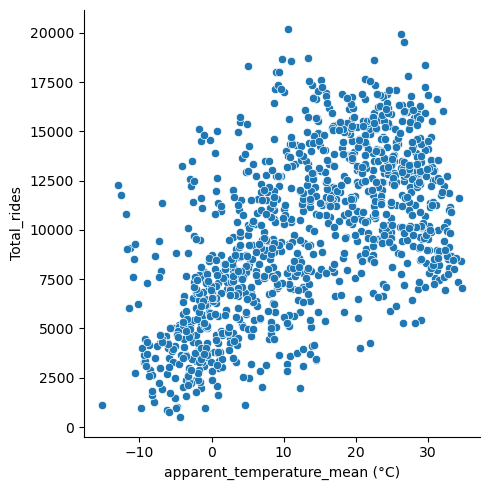

In [130]:
sns.relplot(data= bikes_daily, kind='scatter', x = "apparent_temperature_mean (°C)", y = "Total_rides")

<Axes: xlabel='month', ylabel='Total_rides'>

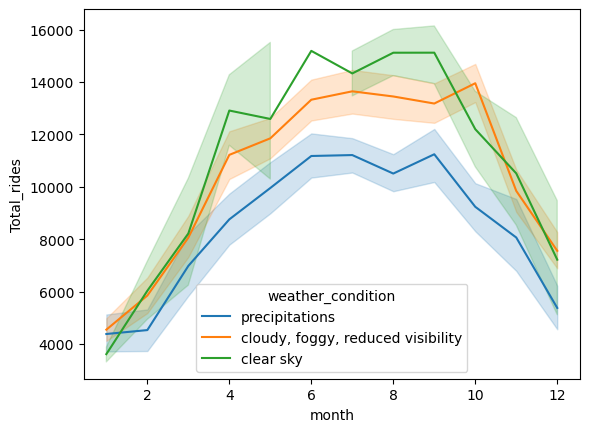

In [133]:
sns.lineplot(data=bikes_daily, x="month", y= "Total_rides", hue="weather_condition")

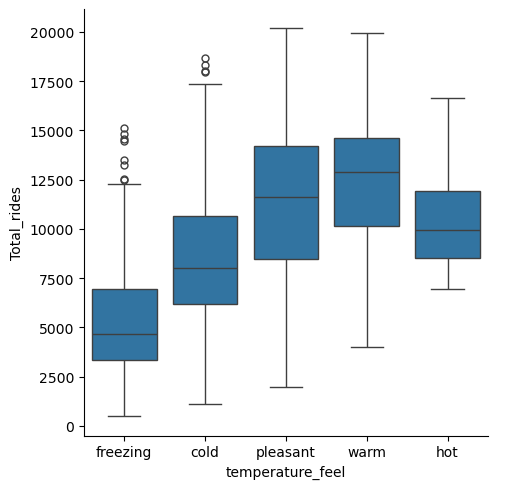

In [138]:
sns.catplot(data = bikes_daily, kind='box', x = "temperature_feel" , y = "Total_rides")